In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

# Handling Missing Values


In [2]:
data = {
    'Age': [25, 30, 45, 40, 55, 50],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F'],
    'Occupation': ['Engineer', 'Doctor', 'Doctor', 'Engineer', 'Lawyer', 'Lawyer'],
    'Income': [50000, np.nan, 80000, np.nan, 120000, 100000]
}

df = pd.DataFrame(data)
print("Original Data:\n")
df

Original Data:



,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,NaN
2,45,M,Doctor,80000.0
3,40,F,Engineer,NaN
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


In [3]:
df['tincome'] = df.groupby('Occupation')['Income'].transform( lambda x : x.mean())
df

,Age,Gender,Occupation,Income,tincome
0,25,M,Engineer,50000.0,50000.0
1,30,F,Doctor,NaN,80000.0
2,45,M,Doctor,80000.0,80000.0
3,40,F,Engineer,NaN,50000.0
4,55,M,Lawyer,120000.0,110000.0
5,50,F,Lawyer,100000.0,110000.0


In [4]:
data = np.array([10, 12, 13, 14, 15, 16, 18, 50, 52, 550])
df = pd.DataFrame({'value': data})
df

,value
0,10
1,12
2,13
3,14
4,15
5,16
6,18
7,50
8,52
9,550


In [5]:
q1 = np.percentile(df.value, 25)
q3 = np.percentile(df.value , 75)
iqr = q3 - q1
q1 , q3 , iqr

(13.25, 42.0, 28.75)

In [6]:
llimit = q1 - (1.5 * iqr)
ulimit = q3 + (1.5 * iqr)
llimit , ulimit

(-29.875, 85.125)

<Axes: ylabel='log'>

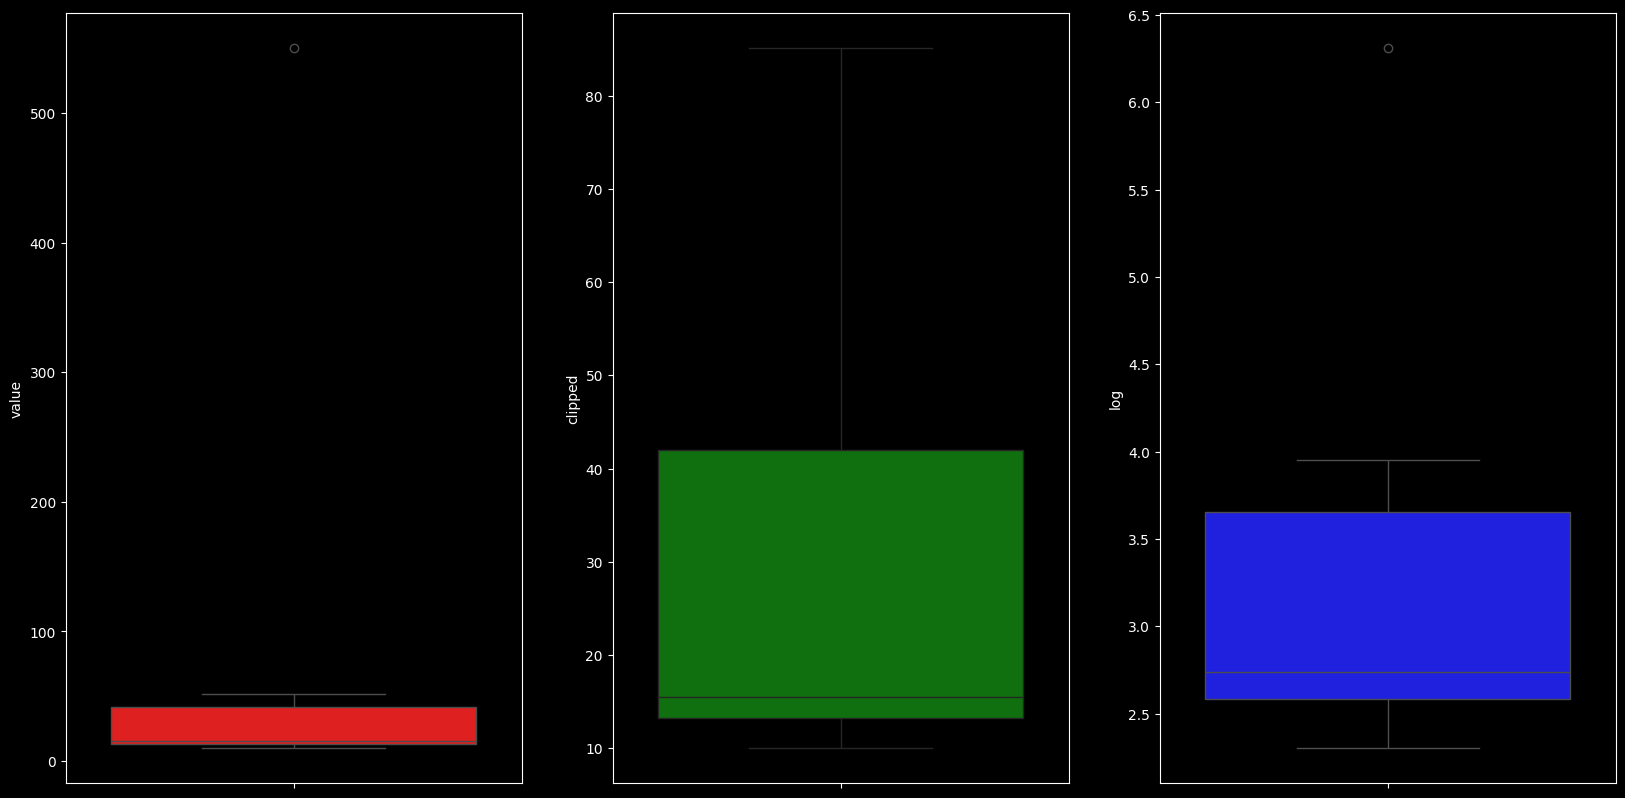

In [7]:
df['clipped'] = df.value.clip(lower = llimit , upper = ulimit)
df['log'] = np.log(df.value)

plt.figure(figsize = (20,10))

plt.subplot(1 , 3, 1)
sns.boxplot(df , y = 'value' , color = 'red')

plt.subplot(1 , 3, 2)
sns.boxplot(df , y = 'clipped' , color = 'green')

plt.subplot(1 ,3, 3)
sns.boxplot(df , y = 'log' , color = 'blue')

In [8]:
df.clipped , np.clip(df.value , llimit , ulimit)

(0    10.000
 1    12.000
 2    13.000
 3    14.000
 4    15.000
 5    16.000
 6    18.000
 7    50.000
 8    52.000
 9    85.125
 Name: clipped, dtype: float64,
 0    10.000
 1    12.000
 2    13.000
 3    14.000
 4    15.000
 5    16.000
 6    18.000
 7    50.000
 8    52.000
 9    85.125
 Name: value, dtype: float64)

# Normalization:


In [9]:
data = pd.DataFrame({
    'salary': [30000, 45000, 55000, 60000, 75000, 120000]
})
print("Original Data:\n", data)

Original Data:
    salary
0   30000
1   45000
2   55000
3   60000
4   75000
5  120000


In [10]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

sscaler = StandardScaler()
mscaler = MinMaxScaler()

data['standard'] = sscaler.fit_transform(data[['salary']])
data['min-max'] = mscaler.fit_transform(data[['salary']])
data

,salary,standard,min-max
0,30000,-1.199159,0.000000
1,45000,-0.672699,0.166667
2,55000,-0.321725,0.277778
3,60000,-0.146239,0.333333
4,75000,0.380221,0.500000
5,120000,1.959601,1.000000


In [11]:
data[['salary']].shape , data['salary'].shape

((6, 1), (6,))

# Encoding:


### Label Encoder:


In [14]:
data = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Asia', 'Australia', 'Europe', 'Asia']
})


print("Original Data:\n", data)

Original Data:
           Region
0  North America
1         Europe
2           Asia
3      Australia
4         Europe
5           Asia


In [16]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit_transform(data.Region)

array([3, 2, 0, 1, 2, 0])

### Ordinal Encoder:


In [17]:
data = pd.DataFrame({
    'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master']
})
# Define the explicit order of categories
education_order = ['High School', 'Bachelor', 'Master', 'PhD']

print("Original Data:\n", data)


Original Data:
   Education_Level
0     High School
1        Bachelor
2          Master
3             PhD
4        Bachelor
5          Master


In [23]:
from sklearn.preprocessing import OrdinalEncoder

oencoder = OrdinalEncoder(categories = [education_order])
oencoder.fit_transform(data[['Education_Level']])

array([[0.],
       [1.],
       [2.],
       [3.],
       [1.],
       [2.]])

### One-Hot Encoding:


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
data = pd.DataFrame({'city': ['New York', 'Paris', 'London', 'Paris']})
data

,city
0,New York
1,Paris
2,London
3,Paris


In [32]:
onehot = OneHotEncoder(sparse_output = False)
onehot.fit_transform(data[['city']])

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [33]:
pd.get_dummies(data.city)

,London,New York,Paris
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,True


# Linear Regression


In [35]:
## 🎯 Real-World Example: Predicting Sales Based on Advertising Spend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew

# Set seed for reproducibility
np.random.seed(42)

# Create advertising budget (in ₹1000s)
ad_spend = np.random.randint(10, 100, size=20)

# Sales = 2.5 * ad_spend + noise
noise = np.random.normal(0, 10, size=20)
sales = 2.5 * ad_spend + noise

# Create DataFrame
df = pd.DataFrame({'ad_spend': ad_spend, 'sales': sales})
df.head()




,ad_spend,sales
0,61,152.722218
1,24,55.722071
2,81,197.181826
3,70,173.825245
4,30,77.220789


<Axes: xlabel='ad_spend', ylabel='sales'>

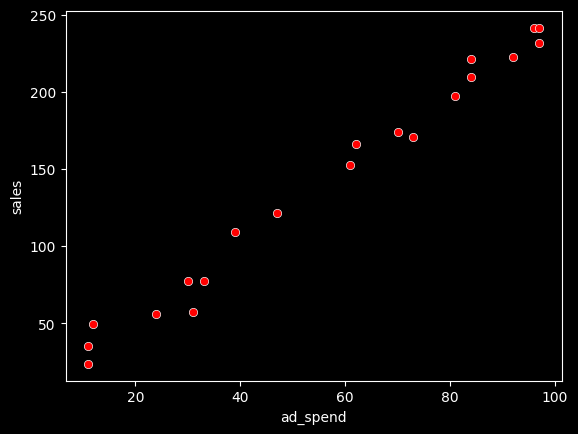

In [41]:
sns.scatterplot(df , x= 'ad_spend' , y = 'sales' , color = 'red')

In [42]:
model = LinearRegression()
model.fit(df[['ad_spend']] , df['sales'])

LinearRegression()

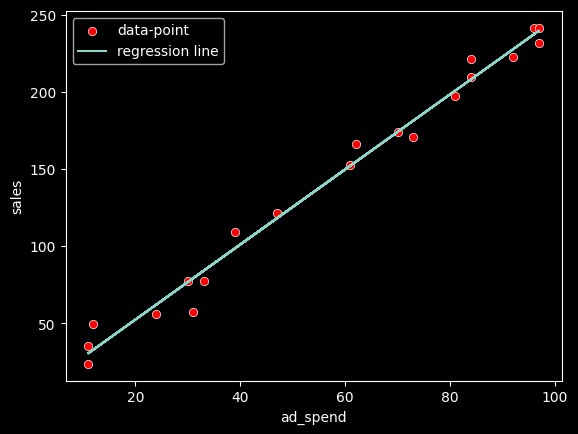

In [53]:
ypred = model.predict(df[['ad_spend']])
sns.scatterplot(df , x = 'ad_spend' , y = 'sales' , color = 'red' , label = 'data-point')
plt.plot(df['ad_spend'] , ypred , label = 'regression line')
plt.legend()
plt.show()

# Logistic Regression:


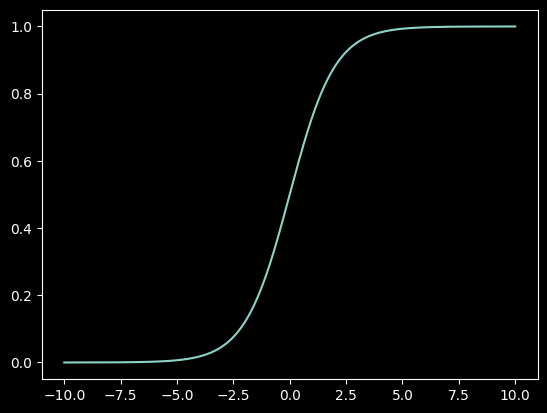

In [12]:
x = np.linspace(-10 , 10 , 1000)
y = 1 / (1 + np.exp(-x))
plt.plot(x , y)

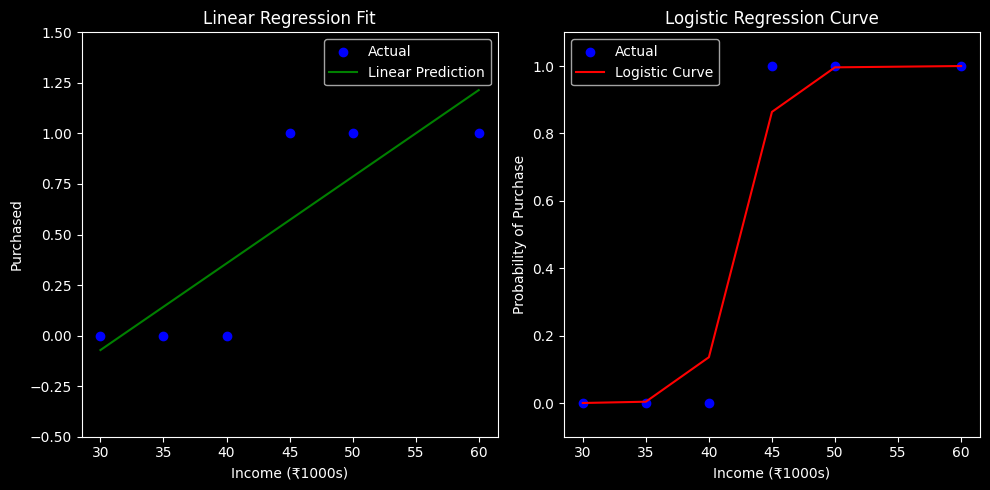

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Dataset
X = np.array([[30], [35], [40], [45], [50], [60]])
y = np.array([0, 0, 0, 1, 1, 1])

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_log_pred = log_reg.predict_proba(X)[:, 1]

# Plotting
plt.figure(figsize=(10, 5))

# Linear
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_lin_pred, color='green', label='Linear Prediction')
plt.title("Linear Regression Fit")
plt.xlabel("Income (₹1000s)")
plt.ylabel("Purchased")
plt.ylim(-0.5, 1.5)
plt.legend()

# Logistic
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_log_pred, color='red', label='Logistic Curve')
plt.title("Logistic Regression Curve")
plt.xlabel("Income (₹1000s)")
plt.ylabel("Probability of Purchase")
plt.ylim(-0.1, 1.1)
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
log_reg.predict_proba(X)

array([[9.99903395e-01, 9.66054803e-05],
       [9.96116094e-01, 3.88390626e-03],
       [8.64040937e-01, 1.35959063e-01],
       [1.36050313e-01, 8.63949687e-01],
       [3.88691175e-03, 9.96113088e-01],
       [2.39587895e-06, 9.99997604e-01]])

#### Consider the data collected from 500 customers in a restaurant. It is observed that 40 of the 80 customers tipped the server who was wearing a black jacket, and 300 of the 420 customers tipped the server who was wearing a different color.

Say x=1 indicates that the server is wearing a black jacket. There will be 420 customers with x=0 and 80 with x=1. And y denotes the event of tipping a server (1 meaning tipped). Use this data to fit a scikit learn logistic regression model to compute the equation for computing the log-odds of giving a tip based on the color of the server’s jacket.


In [76]:
xblack = np.ones(80).reshape(-1,1)
yblack = np.array([1] * 40 + [0] * 40)

xother = np.zeros(420).reshape(-1,1)
yother = np.array([1] * 300 + [0] * 120)

x , y = np.vstack([xblack , xother]) , np.concatenate([yblack , yother])
x.shape , y.shape

((500, 1), (500,))

In [77]:
lr = LogisticRegression()
lr.fit(x, y)
lr.coef_ , lr.intercept_

(array([[-0.86318297]]), array([0.90625126]))

In [87]:
w = np.array([0.05 , 1]).reshape(-1)
x = np.array([40 , 3.5]).reshape(1 , -1)
w0 = -6
z = x @ w + w0
1 / (1 + np.e**(-z))

array([0.37754067])